In [2]:
print("Lab9")

Lab9


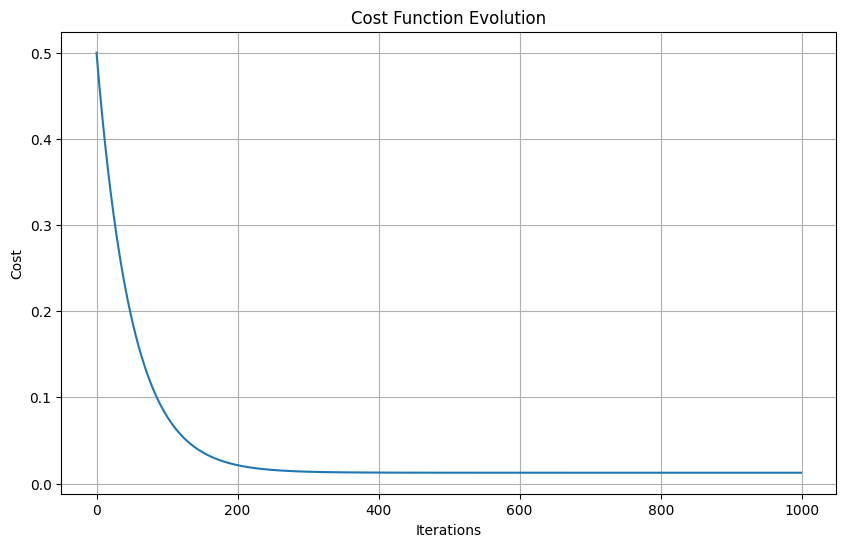

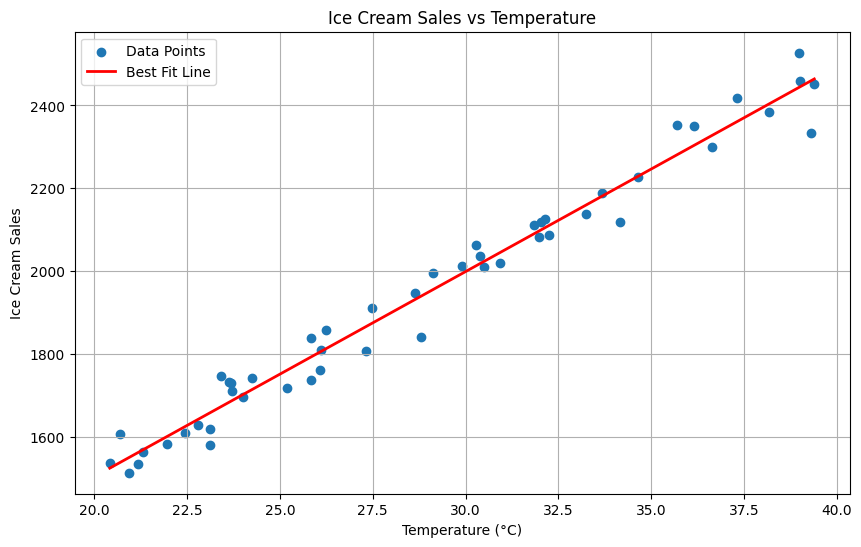

Final theta values: [2.38908893e-16 9.87334712e-01]
Denormalized equation: Ice_Cream_Sales = 1945.78 + 49.44 * (Temperature_C - 28.92)


In [ ]:
# 1. Implement the linear regression for the univariate problem using gradient descent for the attached data file ice_cream_sales_vs_temperature.csv. Plot the cost function and the best-fit line. (you can only use numpy and pandas library).
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the data
data = pd.read_csv('ice_cream_sales_vs_temperature.csv')

# Extracting the data
X = data['Temperature_C'].values
Y = data['Ice_Cream_Sales'].values

# Normalizing the data
X_mean, X_std = X.mean(), X.std()
Y_mean, Y_std = Y.mean(), Y.std()
X_norm = (X - X_mean) / X_std
Y_norm = (Y - Y_mean) / Y_std

# Adding the bias term
X_b = np.c_[np.ones(X_norm.shape[0]), X_norm]

# Initializing parameters
theta = np.zeros(2)
iterations = 1000
alpha = 0.01
m = len(X_norm)
cost_history = np.zeros(iterations)

# Gradient descent
for i in range(iterations):
    predictions = X_b.dot(theta)
    errors = predictions - Y_norm
    gradients = X_b.T.dot(errors) / m
    theta = theta - alpha * gradients
    cost_history[i] = (errors**2).sum() / (2*m)

# cost function
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Evolution')
plt.grid(True)
plt.show()

# Plot best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Data Points')

# Generate points for the best fit line
X_plot = np.array([min(X), max(X)])
X_plot_norm = (X_plot - X_mean) / X_std
Y_plot_norm = theta[0] + theta[1] * X_plot_norm
Y_plot = Y_plot_norm * Y_std + Y_mean

plt.plot(X_plot, Y_plot, 'r-', linewidth=2, label='Best Fit Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales')
plt.title('Ice Cream Sales vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Print final parameters
print(f"Final theta values: {theta}")
print(f"Denormalized equation: Ice_Cream_Sales = {theta[0]*Y_std+Y_mean:.2f} + {theta[1]*Y_std/X_std:.2f} * (Temperature_C - {X_mean:.2f})")


Dataset shape: (50, 12)

Data types:
layer_height          float64
wall_thickness          int64
infill_density          int64
infill_pattern         object
nozzle_temperature      int64
bed_temperature         int64
print_speed             int64
material               object
fan_speed               int64
roughness               int64
tensile_strength        int64
elongation            float64
dtype: object

Summary statistics:
       layer_height  wall_thickness  infill_density  nozzle_temperature  \
count     50.000000       50.000000        50.00000           50.000000   
mean       0.106000        5.220000        53.40000          221.500000   
std        0.064397        2.922747        25.36348           14.820353   
min        0.020000        1.000000        10.00000          200.000000   
25%        0.060000        3.000000        40.00000          210.000000   
50%        0.100000        5.000000        50.00000          220.000000   
75%        0.150000        7.000000        

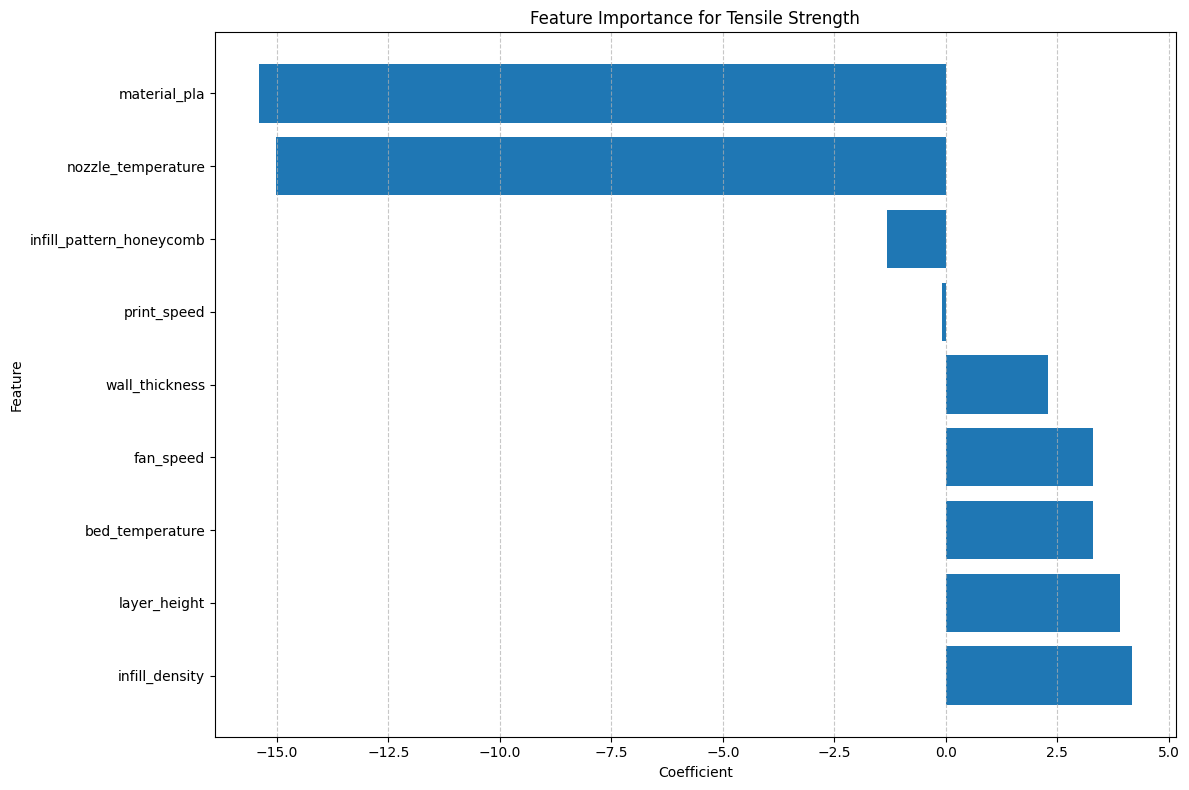

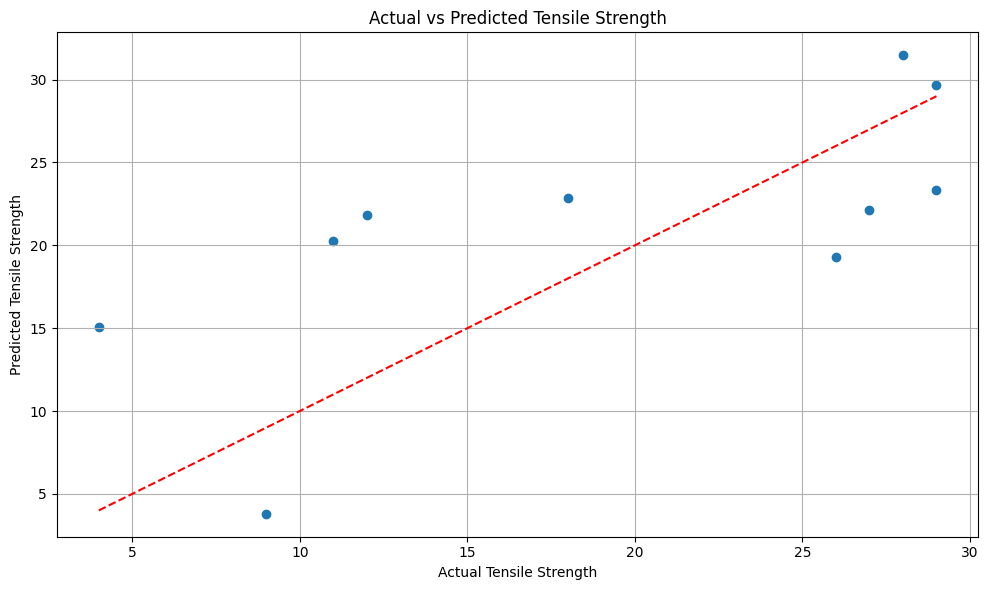

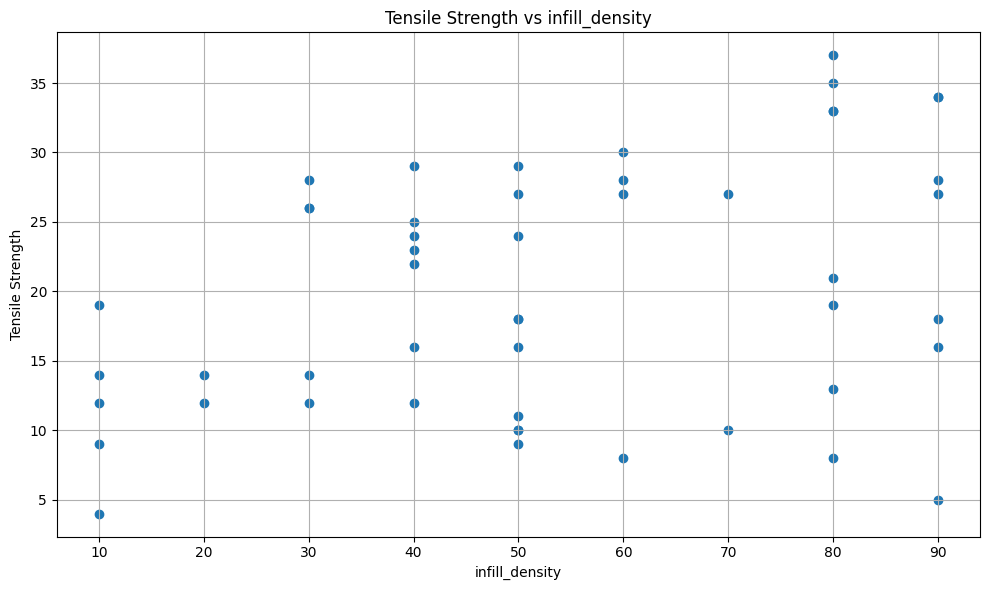

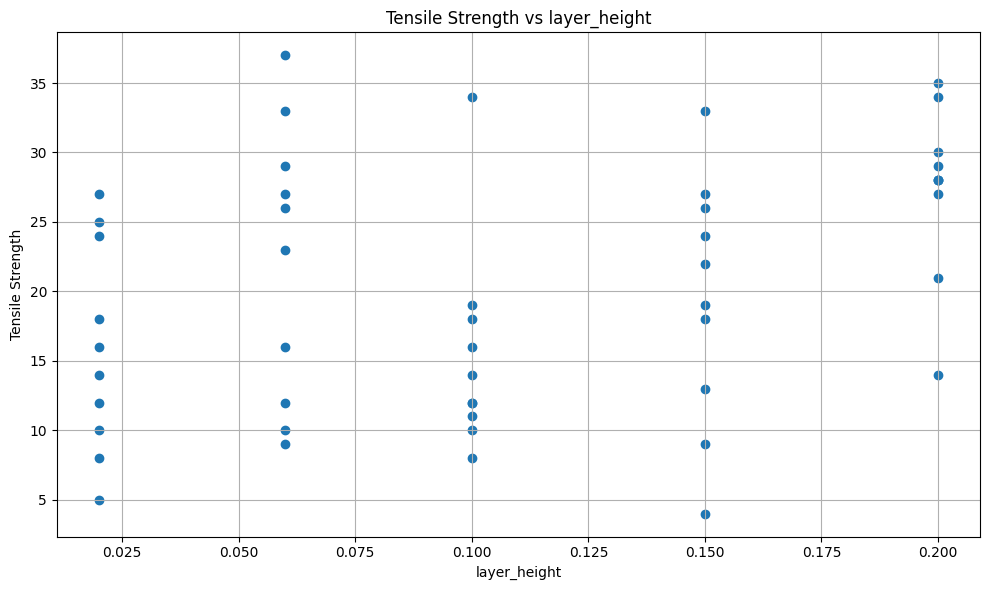

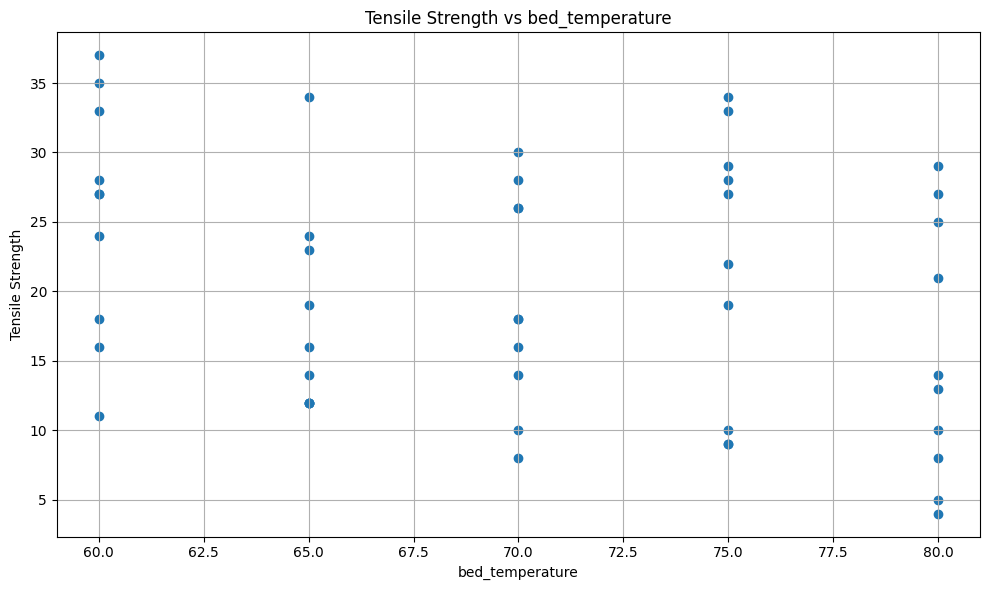


Summary of Findings:
1. The model explains 43.57% of the variance in tensile strength
2. Most important factors affecting tensile strength (by magnitude):
   - infill_density: 4.1763
   - layer_height: 3.9010
   - bed_temperature: 3.3024
3. Least important factors:
   - infill_pattern_honeycomb: -1.3094
   - nozzle_temperature: -15.0144
   - material_pla: -15.4049


In [11]:
# 2. Using the given dataset, 3D_printing_data.csv,  find how the 3D printing parameters (layer height, wall thickness, infill density, nozzle temperature, bed temperature, print speed, material, and fan speed) affect the tensile strength of the printed object. (Do the necessary data cleaning and preprocessing before performing the linear regression)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load and clean data
data = pd.read_csv('3D_printing_data.csv')
data = data.dropna()

# Check for and fix column name typo if present
if 'tension_strenght' in data.columns:
    data.rename(columns={'tension_strenght': 'tensile_strength'}, inplace=True)

# Explore data
print(f"Dataset shape: {data.shape}")
print("\nData types:")
print(data.dtypes)
print("\nSummary statistics:")
print(data.describe())

# Handle categorical variables
categorical_cols = ['infill_pattern', 'material']
numerical_cols = ['layer_height', 'wall_thickness', 'infill_density', 
                 'nozzle_temperature', 'bed_temperature', 'print_speed', 'fan_speed']

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = encoder.fit_transform(data[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Combine numerical and encoded categorical data
X_numerical = data[numerical_cols].values
X = np.hstack([X_numerical, encoded_cats])

# Feature names for interpretation
feature_names = numerical_cols + list(encoded_feature_names)

# Target variable
y = data['tensile_strength'].values

# Scale numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)
X_scaled = np.hstack([X_numerical_scaled, encoded_cats])

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Analyze feature importance
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values('Coefficient', ascending=False)

print("\nFeature Importance (sorted by coefficient magnitude):")
print(coefficients)

# Visualize feature importance
plt.figure(figsize=(12, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance for Tensile Strength')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Actual vs Predicted Tensile Strength')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize relationship between key predictors and tensile strength
important_features = coefficients.head(3)['Feature'].values

for feature in important_features:
    if feature in numerical_cols:
        plt.figure(figsize=(10, 6))
        plt.scatter(data[feature], data['tensile_strength'])
        plt.xlabel(feature)
        plt.ylabel('Tensile Strength')
        plt.title(f'Tensile Strength vs {feature}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Summary of findings
print("\nSummary of Findings:")
print(f"1. The model explains {r2:.2%} of the variance in tensile strength")
print("2. Most important factors affecting tensile strength (by magnitude):")
for i, row in coefficients.head(3).iterrows():
    print(f"   - {row['Feature']}: {row['Coefficient']:.4f}")
print(f"3. Least important factors:")
for i, row in coefficients.tail(3).iterrows():
    print(f"   - {row['Feature']}: {row['Coefficient']:.4f}")


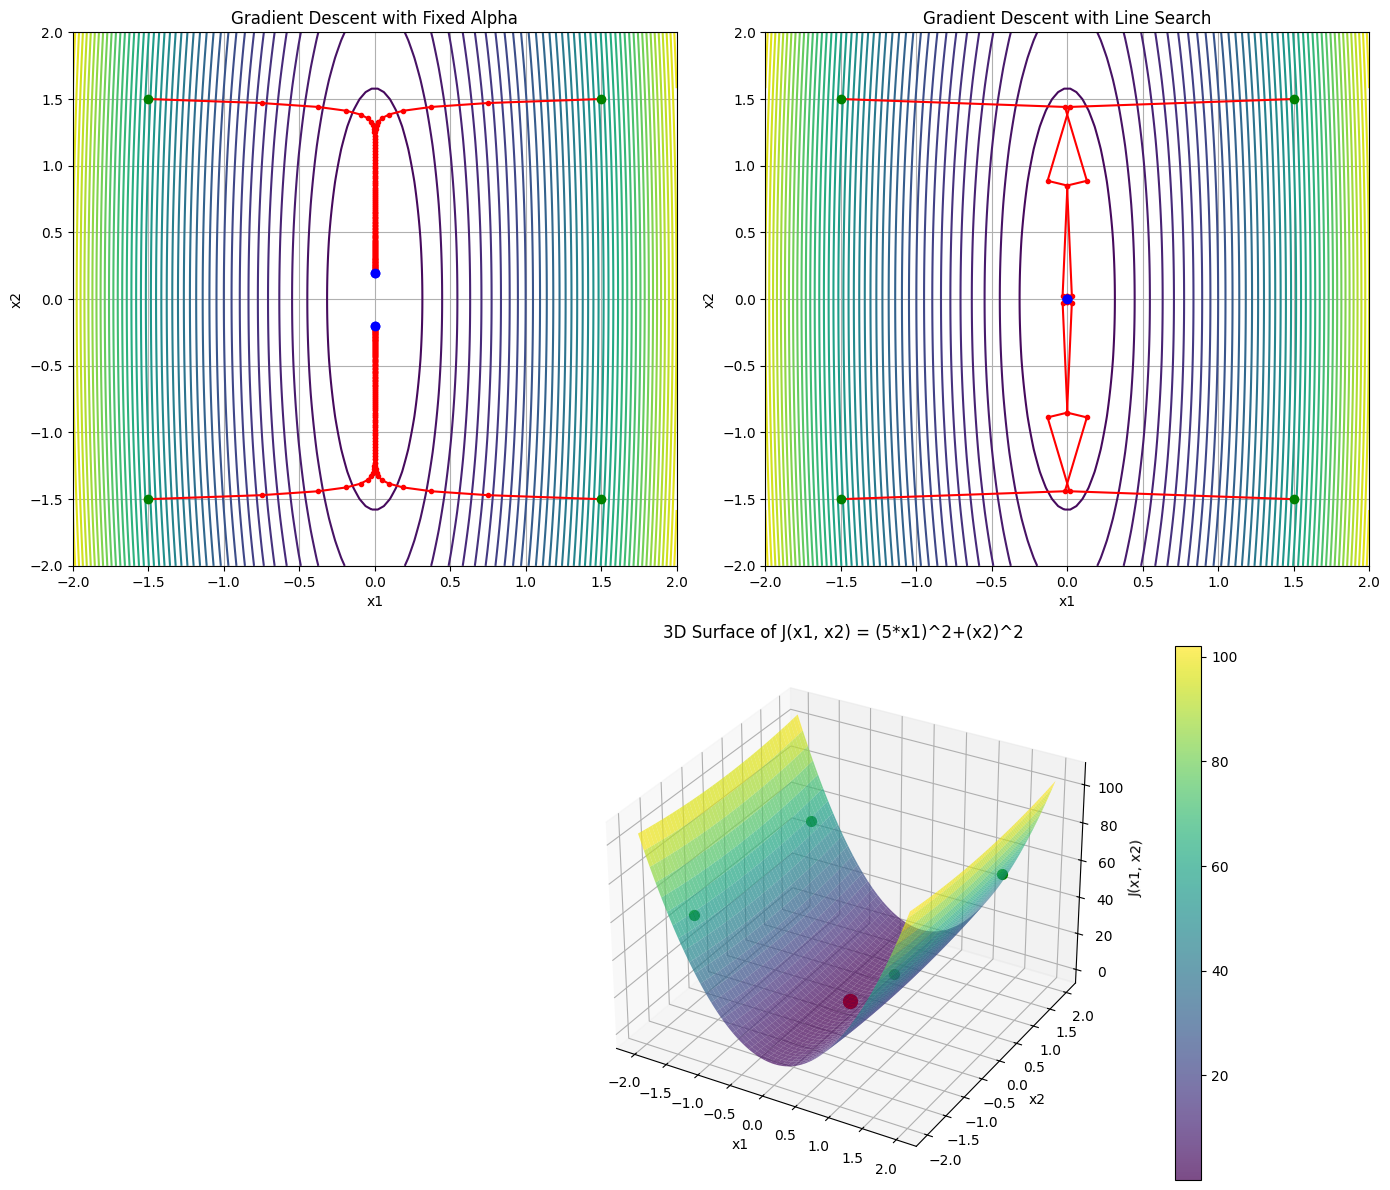

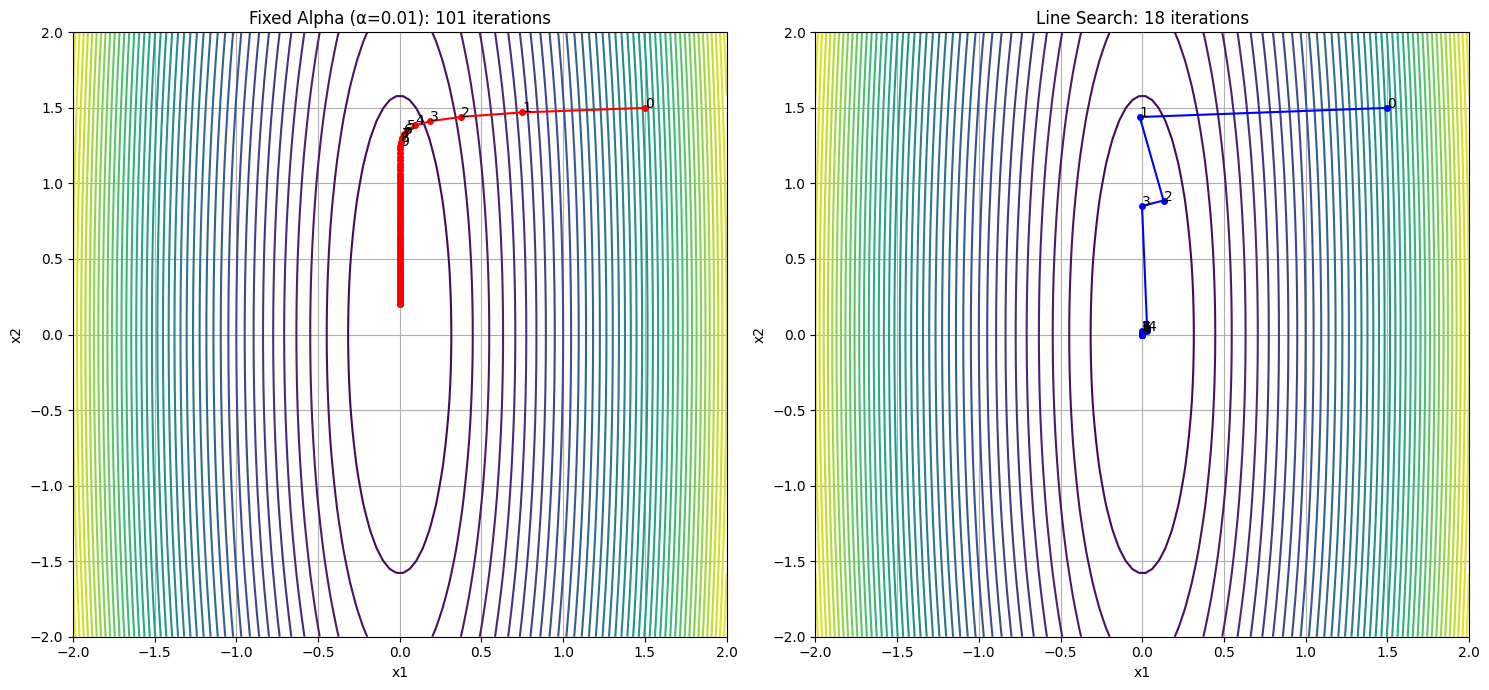

The function J(x1, x2) = (5*x1)^2+(x2)^2 has a single local minimum at:
x1 = 0
x2 = 0
J(0,0) = 0

Results with fixed alpha:
Starting point: [1.5, 1.5]
Final point: [1.18329136e-30 1.98929334e-01]
Function value: 0.039572879862873535
Iterations: 101

Results with line search:
Starting point: [1.5, 1.5]
Final point: [-1.79010892e-09  1.52036884e-07]
Function value: 2.3195326455630203e-14
Iterations: 18


In [13]:
# 4.Using steepest gradient descent, find all the local minima for the function  J(x1, x2) = (5*x1)^2+(x2)^2. While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show one of the minimal point.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function J(x1, x2) = (5*x1)^2+(x2)^2
def J(x):
    return (5*x[0])**2 + x[1]**2

# Define the gradient of J
def grad_J(x):
    return np.array([2*(5**2)*x[0], 2*x[1]])

# Line search to find optimal alpha
def line_search(x, direction):
    # Function to minimize along the line
    def f(alpha):
        return J(x - alpha * direction)
    
    # Simple grid search for optimal alpha
    alphas = np.linspace(0, 1, 100)
    values = [f(alpha) for alpha in alphas]
    optimal_alpha = alphas[np.argmin(values)]
    
    return optimal_alpha

# Gradient descent with fixed alpha
def gradient_descent_fixed_alpha(start_point, alpha=0.01, max_iter=100, tol=1e-6):
    x = np.array(start_point, dtype=float)
    path = [x.copy()]
    
    for i in range(max_iter):
        gradient = grad_J(x)
        if np.linalg.norm(gradient) < tol:
            break
            
        x = x - alpha * gradient
        path.append(x.copy())
    
    return np.array(path)

# Gradient descent with line search
def gradient_descent_line_search(start_point, max_iter=100, tol=1e-6):
    x = np.array(start_point, dtype=float)
    path = [x.copy()]
    
    for i in range(max_iter):
        gradient = grad_J(x)
        if np.linalg.norm(gradient) < tol:
            break
            
        alpha = line_search(x, gradient)
        x = x - alpha * gradient
        path.append(x.copy())
    
    return np.array(path)

# Generate a grid of points
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

# Calculate Z values
for i in range(len(x1)):
    for j in range(len(x2)):
        Z[j, i] = J([X1[j, i], X2[j, i]])

# Starting points for gradient descent
starting_points = [
    [1.5, 1.5],
    [-1.5, 1.5],
    [1.5, -1.5],
    [-1.5, -1.5]
]

# Plot the function contour
plt.figure(figsize=(14, 12))

# Part (a): Fixed alpha
plt.subplot(2, 2, 1)
plt.contour(X1, X2, Z, 50, cmap='viridis')
plt.title('Gradient Descent with Fixed Alpha')
plt.xlabel('x1')
plt.ylabel('x2')

# Apply gradient descent with fixed alpha to all starting points
for start in starting_points:
    path = gradient_descent_fixed_alpha(start, alpha=0.01)
    plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=3)
    plt.plot(path[0, 0], path[0, 1], 'go', markersize=6)  # Starting point
    plt.plot(path[-1, 0], path[-1, 1], 'bo', markersize=6)  # Final point

plt.grid(True)

# Part (b): Line search
plt.subplot(2, 2, 2)
plt.contour(X1, X2, Z, 50, cmap='viridis')
plt.title('Gradient Descent with Line Search')
plt.xlabel('x1')
plt.ylabel('x2')

# Apply gradient descent with line search to all starting points
for start in starting_points:
    path = gradient_descent_line_search(start)
    plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=3)
    plt.plot(path[0, 0], path[0, 1], 'go', markersize=6)  # Starting point
    plt.plot(path[-1, 0], path[-1, 1], 'bo', markersize=6)  # Final point

plt.grid(True)

# 3D surface plot
ax = plt.subplot(2, 1, 2, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7)
plt.colorbar(surf)
plt.title('3D Surface of J(x1, x2) = (5*x1)^2+(x2)^2')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('J(x1, x2)')

# Plot the starting points
for start in starting_points:
    ax.scatter(start[0], start[1], J(start), color='green', s=50)
    
# Plot the minimum
ax.scatter(0, 0, J([0, 0]), color='red', s=100)

plt.tight_layout()
plt.show()

# Detailed plot for one starting point
start_point = [1.5, 1.5]
path_fixed = gradient_descent_fixed_alpha(start_point, alpha=0.01)
path_line_search = gradient_descent_line_search(start_point)

plt.figure(figsize=(15, 7))

# Fixed alpha
plt.subplot(1, 2, 1)
plt.contour(X1, X2, Z, 50, cmap='viridis')
plt.plot(path_fixed[:, 0], path_fixed[:, 1], 'r-o', markersize=4)
for i in range(min(10, len(path_fixed))):
    plt.annotate(str(i), (path_fixed[i, 0], path_fixed[i, 1]))
plt.title(f'Fixed Alpha (α=0.01): {len(path_fixed)} iterations')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

# Line search
plt.subplot(1, 2, 2)
plt.contour(X1, X2, Z, 50, cmap='viridis')
plt.plot(path_line_search[:, 0], path_line_search[:, 1], 'b-o', markersize=4)
for i in range(min(10, len(path_line_search))):
    plt.annotate(str(i), (path_line_search[i, 0], path_line_search[i, 1]))
plt.title(f'Line Search: {len(path_line_search)} iterations')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)

plt.tight_layout()
plt.show()

# Report the minimum
print("The function J(x1, x2) = (5*x1)^2+(x2)^2 has a single local minimum at:")
print("x1 =", 0)
print("x2 =", 0)
print("J(0,0) =", J([0, 0]))
print("\nResults with fixed alpha:")
print(f"Starting point: {start_point}")
print(f"Final point: {path_fixed[-1]}")
print(f"Function value: {J(path_fixed[-1])}")
print(f"Iterations: {len(path_fixed)}")
print("\nResults with line search:")
print(f"Starting point: {start_point}")
print(f"Final point: {path_line_search[-1]}")
print(f"Function value: {J(path_line_search[-1])}")
print(f"Iterations: {len(path_line_search)}")



Degree 1 Polynomial:
Coefficients: [-2.98891539 67.95438172]
RMSE: 59.729500703565485
Equation: y = -2.9889x + 67.9544

Degree 2 Polynomial:
Coefficients: [ 1.9929962  -2.98891539  1.25490985]
RMSE: 2.9326311280783623
Equation: y = 1.9930x^2 + -2.9889x + 1.2549

Degree 3 Polynomial:
Coefficients: [-4.46950524e-05  1.99299620e+00 -2.98622296e+00  1.25490985e+00]
RMSE: 2.932623249526046
Equation: y = -0.0000x^3 + 1.9930x^2 + -2.9862x + 1.2549

Degree 4 Polynomial:
Coefficients: [-1.97747327e-06 -4.46950524e-05  1.99316637e+00 -2.98622296e+00
  1.25320132e+00]
RMSE: 2.9326228563021233
Equation: y = -0.0000x^4 + -0.0000x^3 + 1.9932x^2 + -2.9862x + 1.2532


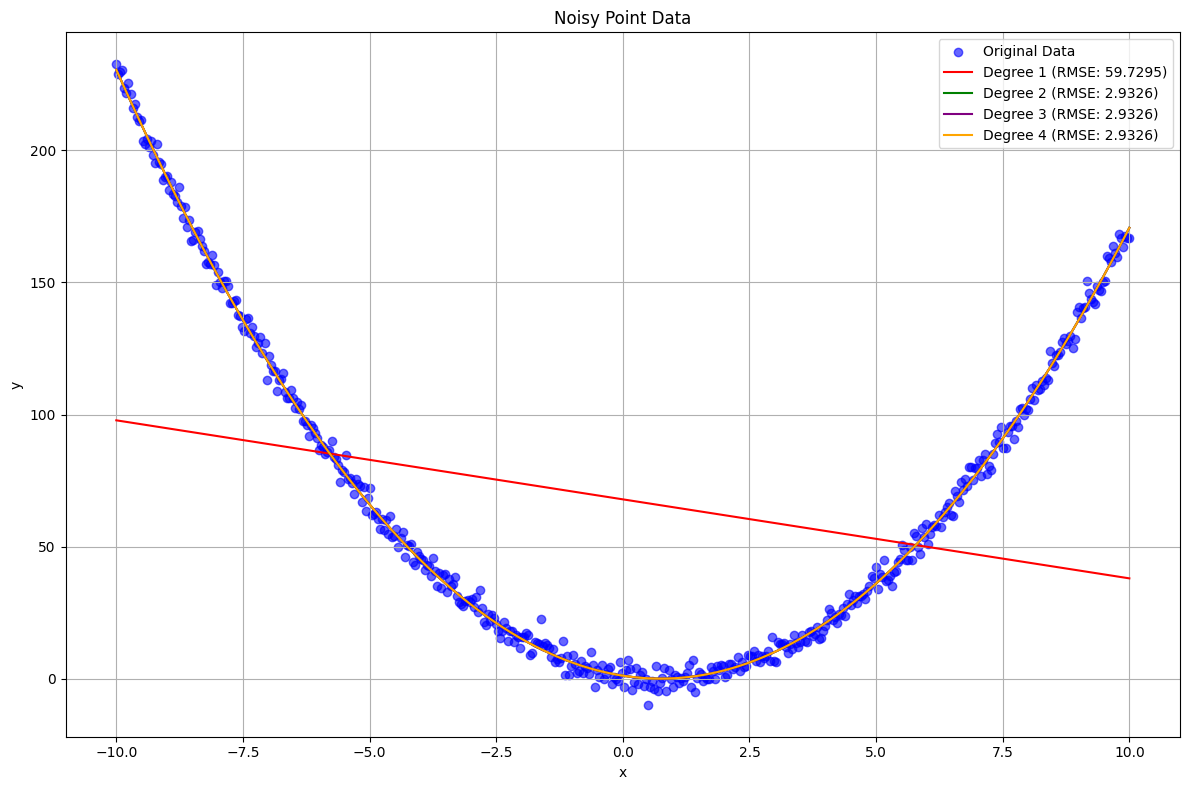

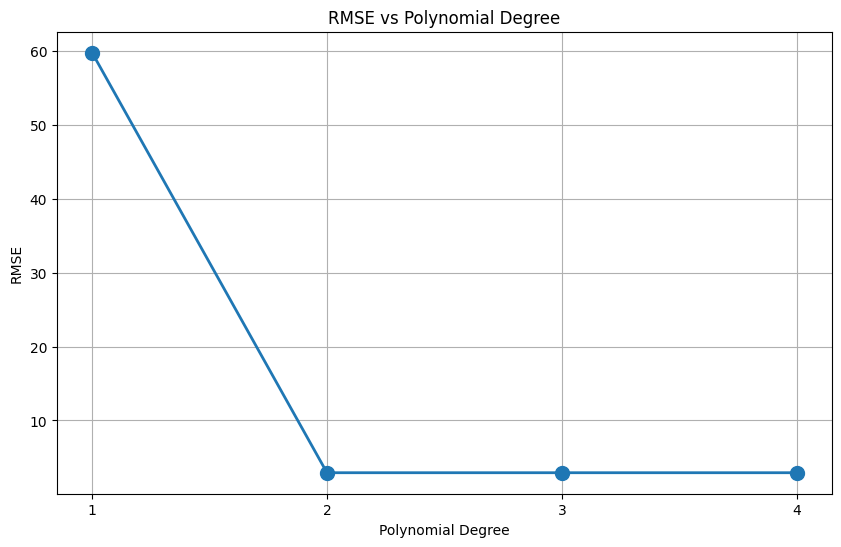


Best Polynomial Fit: Degree 4 with RMSE 2.9326


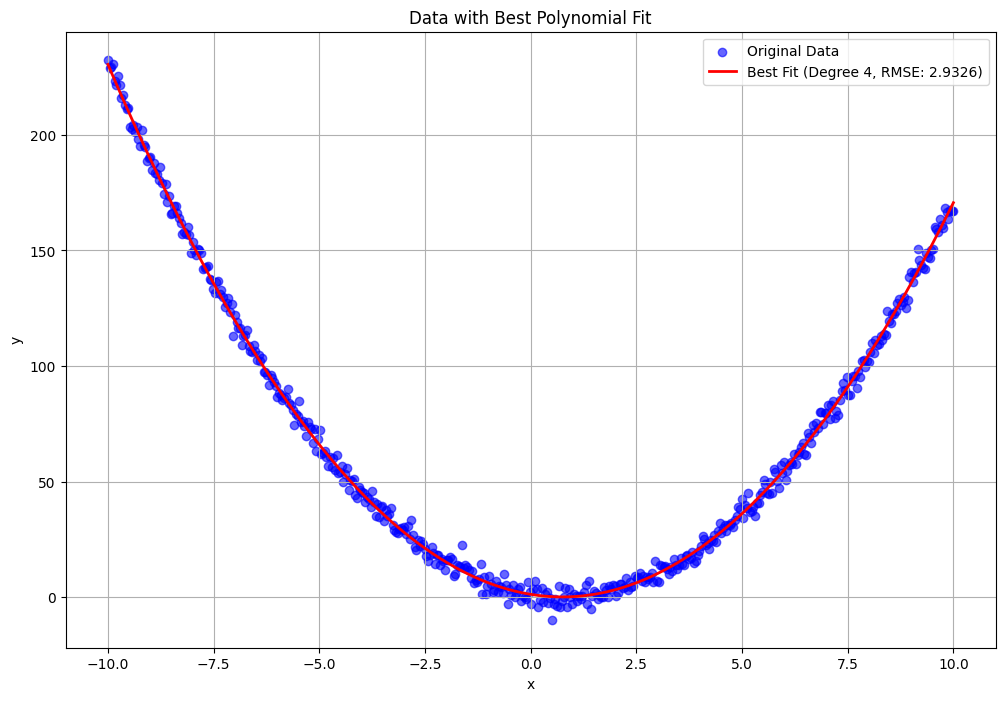

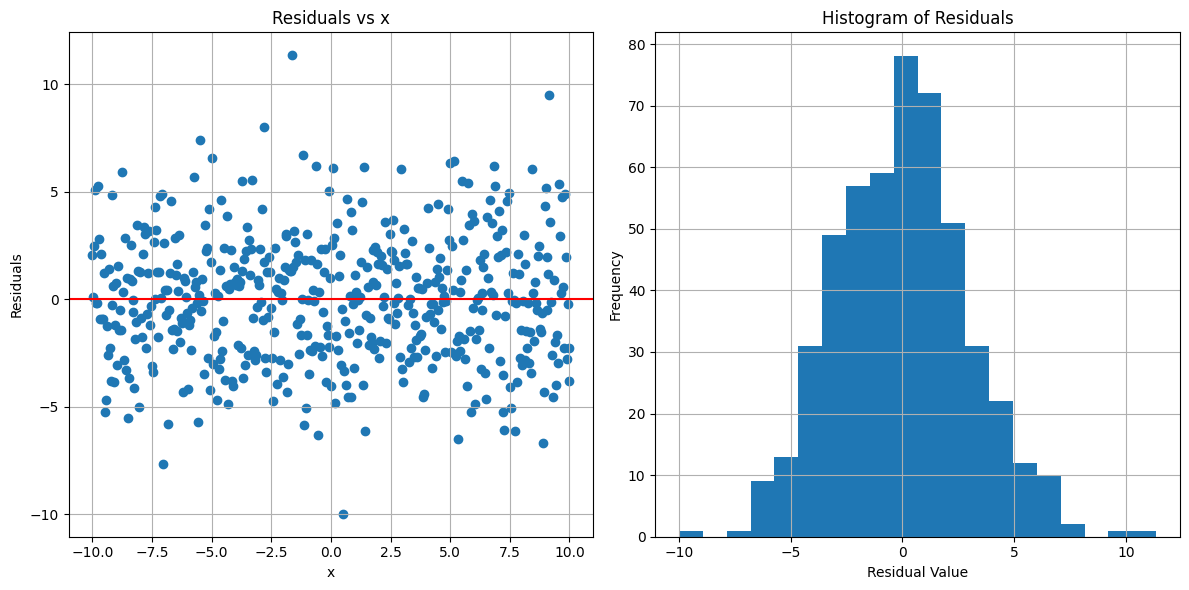


Nature of the curve:
The curve is quartic in nature, potentially with multiple turning points


In [15]:
# 3.  Fit polynomial equations of degree 1  to 4  for the given data noisy_point_data.csv.  Determine the values of coefficients that minimize the residual error(RMSE). Plot the original data with your best-fit line. Explain why your chosen polynomial degree is appropriate for this data
# Also, find the nature of the curve.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('noisy_point_data.csv')
x = data['x'].values
y = data['y'].values

# Plot the original data
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue', alpha=0.6, label='Original Data')
plt.title('Noisy Point Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Fit polynomial equations of degree 1 to 4
degrees = [1, 2, 3, 4]
colors = ['red', 'green', 'purple', 'orange']
rmse_values = []
coefficients_list = []

# Create a smooth x range for plotting the polynomials
x_smooth = np.linspace(min(x), max(x), 1000)

for i, degree in enumerate(degrees):
    # Fit polynomial
    coefficients = np.polyfit(x, y, degree)
    coefficients_list.append(coefficients)
    
    # Calculate predicted y values
    y_pred = np.polyval(coefficients, x)
    
    # Calculate RMSE
    rmse = np.sqrt(np.mean((y - y_pred)**2))
    rmse_values.append(rmse)
    
    # Generate smooth curve for plotting
    y_smooth = np.polyval(coefficients, x_smooth)
    
    # Plot the polynomial fit
    plt.plot(x_smooth, y_smooth, color=colors[i], 
             label=f'Degree {degree} (RMSE: {rmse:.4f})')
    
    # Print coefficients
    print(f"\nDegree {degree} Polynomial:")
    print("Coefficients:", coefficients)
    print("RMSE:", rmse)
    
    # Print polynomial equation
    equation = "y = "
    for j, coef in enumerate(coefficients):
        power = degree - j
        if power == 0:
            equation += f"{coef:.4f}"
        elif power == 1:
            equation += f"{coef:.4f}x + "
        else:
            equation += f"{coef:.4f}x^{power} + "
    
    print("Equation:", equation)

plt.legend()
plt.tight_layout()
plt.show()

# Plot RMSE vs Polynomial Degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, rmse_values, 'o-', linewidth=2, markersize=10)
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs Polynomial Degree')
plt.grid(True)
plt.xticks(degrees)
plt.show()

# Find the best polynomial degree
best_degree_index = np.argmin(rmse_values)
best_degree = degrees[best_degree_index]
best_rmse = rmse_values[best_degree_index]
best_coefficients = coefficients_list[best_degree_index]

print(f"\nBest Polynomial Fit: Degree {best_degree} with RMSE {best_rmse:.4f}")

# Plot just the original data and the best fit
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='blue', alpha=0.6, label='Original Data')
y_smooth_best = np.polyval(best_coefficients, x_smooth)
plt.plot(x_smooth, y_smooth_best, color='red', linewidth=2, 
         label=f'Best Fit (Degree {best_degree}, RMSE: {best_rmse:.4f})')
plt.title('Data with Best Polynomial Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Analyze residuals for the best fit
y_pred_best = np.polyval(best_coefficients, x)
residuals = y - y_pred_best

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residuals vs x')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

# Determine the nature of the curve based on the best fit
if best_degree == 2:
    a = best_coefficients[0]
    print("\nNature of the curve:")
    if a > 0:
        print("The curve is concave up (U-shaped parabola)")
    else:
        print("The curve is concave down (inverted U-shaped parabola)")
elif best_degree == 3:
    print("\nNature of the curve:")
    print("The curve is cubic in nature, with possible inflection points")
    # Find potential inflection points
    derivative_coef = np.polyder(best_coefficients, 2)
    potential_inflection = np.roots(derivative_coef)
    real_inflections = potential_inflection[np.isreal(potential_inflection)].real
    in_range_inflections = [p for p in real_inflections if min(x) <= p <= max(x)]
    if in_range_inflections:
        print(f"Inflection points (within data range): {in_range_inflections}")
elif best_degree == 4:
    print("\nNature of the curve:")
    print("The curve is quartic in nature, potentially with multiple turning points")
else:
    print("\nNature of the curve:")
    print("The curve is linear (straight line)")


